# Projeto 2 - Ciência dos Dados
Turma 2A
<br>
Grupo: Alice Longman, Lorena Budin Carmona, Luísa Manzig Kyrillos, Sarah Azevedo Pimenta da Costa

### OBJETIVO DO PROJETO:
- Responder se: a partir de informações sobre uma mulher, é possível identificar uma pré disposição a câncer cervical?
- O nosso target é qualitativo, uma que queremos prever uma pré disposição.

In [50]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from numpy import arange
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from scipy.stats import linregress
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.tree import export_graphviz
import pydot
from graphviz import render
import datetime
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import (confusion_matrix, accuracy_score)

In [2]:
# Abrindo dataset e transformando em dataframe
filename = 'kag_risk_factors_cervical_cancer.csv'
dados = pd.read_csv(filename)

# Retirada de colunas por falta de informação ou por irrelevância
del dados['STDs: Time since first diagnosis']
del dados['STDs: Time since last diagnosis'] 
del dados['Dx:Cancer'] 
del dados['Dx:CIN'] 
del dados['Dx:HPV'] 
del dados['Dx'] 
del dados['Hinselmann'] 
del dados['Schiller'] 
del dados['Citology'] 
del dados['STDs:cervical condylomatosis']
del dados['STDs:AIDS']


dados.Biopsy.value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

In [3]:
# Substituindo falta de valores por NaN
dados = dados.replace(to_replace='?',value=np.nan)

In [4]:
#Eliminando os NaN 
dados_final = dados.dropna()
dados_final.shape

(668, 25)

**Justificativa retirada dos NaN**



As linhas com o valor NaN eram prejudiciais a análise principalmente com o uso da função DecisionTreeClassifier, pois não fornecia valores, atrapalhando na análise. 
Foi possível realizar essa retirada, pois ainda foi preservado um número suficiente de linhas para fazer a análise de maneira completa. 

### Definindo as variáveis qualitativas como categorias

In [5]:
# Transformando em categoria
dados['Smokes'] = dados['Smokes'].astype('category')
dados['Hormonal Contraceptives'] = dados['Hormonal Contraceptives'].astype('category')
dados['IUD'] = dados['IUD'].astype('category')
dados['STDs'] = dados['STDs'].astype('category')
dados['STDs:condylomatosis'] = dados['STDs:condylomatosis'].astype('category')
dados['STDs:vaginal condylomatosis'] = dados['STDs:vaginal condylomatosis'].astype('category')
dados['STDs:vulvo-perineal condylomatosis'] = dados['STDs:vulvo-perineal condylomatosis'].astype('category')
dados['STDs:syphilis'] = dados['STDs:syphilis'].astype('category')
dados['STDs:pelvic inflammatory disease'] = dados['STDs:pelvic inflammatory disease'].astype('category')
dados['STDs:genital herpes'] = dados['STDs:genital herpes'].astype('category')
dados['STDs:molluscum contagiosum'] = dados['STDs:molluscum contagiosum'].astype('category')
dados['STDs:HIV'] = dados['STDs:HIV'].astype('category')
dados['STDs:Hepatitis B'] = dados['STDs:Hepatitis B'].astype('category')
dados['STDs:HPV'] = dados['STDs:HPV'].astype('category')
dados['Biopsy'] = dados['Biopsy'].astype('category')

In [6]:
# Transformando objeto em float
dados['Number of sexual partners'] = dados['Number of sexual partners'].astype('float')
dados['First sexual intercourse'] = dados['First sexual intercourse'].astype('float')
dados['Num of pregnancies'] = dados['Num of pregnancies'].astype('float')
dados['Smokes (years)'] = dados['Smokes (years)'].astype('float')
dados['Smokes (packs/year)'] = dados['Smokes (packs/year)'].astype('float')
dados['Hormonal Contraceptives (years)'] = dados['Hormonal Contraceptives (years)'].astype('float')
dados['IUD (years)'] = dados['IUD (years)'].astype('float')
dados['STDs (number)'] = dados['STDs (number)'].astype('float')

In [7]:
# Substituindo códigos numéricos por respectivos nomes
dados['Smokes'].cat.categories = ['No',  'Yes']
dados['Hormonal Contraceptives'].cat.categories = ['No',  'Yes']
dados['IUD'].cat.categories = ['No',  'Yes']
dados['STDs'].cat.categories = ['No',  'Yes']
dados['STDs:condylomatosis'].cat.categories = ['No',  'Yes']
dados['STDs:vulvo-perineal condylomatosis'].cat.categories = ['No',  'Yes']
dados['STDs:syphilis'].cat.categories = ['No',  'Yes']
dados['STDs:pelvic inflammatory disease'].cat.categories = ['No',  'Yes']
dados['STDs:genital herpes'].cat.categories = ['No',  'Yes']
dados['STDs:molluscum contagiosum'].cat.categories = ['No',  'Yes']
dados['STDs:HIV'].cat.categories = ['No',  'Yes']
dados['STDs:Hepatitis B'].cat.categories = ['No',  'Yes']
dados['STDs:HPV'].cat.categories = ['No',  'Yes']
dados['STDs:vaginal condylomatosis'].cat.categories = ['No',  'Yes']
dados['Biopsy'].cat.categories = ['No',  'Yes']

### Descrição do dataset
- As informações do dataset foram obtidas a partir da coleta de dados de mulheres que foram diagnosticadas com câncer cervical.
- A base de dados contém diversas informações pessoais, como idade, quantidade de parceiros sexuais, número de gravidez e etc.

### Índice do dataset
- *__Biopsy__*: possui câncer (0 = Não ou 1 = Sim)
- *__Age__*: idade (numérico: de 13 à 84)
- *__Number of sexual partners__*: número de parceiros sexuais 
- *__First sexual intercourse__*: idade da primeira relação sexual 
- *__Num of pregnancies__*: quantas vezes engravidou
- *__Smokes__*: fumante (0 = Não ou 1 = Sim)
- *__Smokes (years)__*: há quantos anos fuma 
- *__Smokes (packs/year)__*: número de maços de cigarro por ano 
- *__Hormonal Contraceptives__*: utiliza anticoncepcional (0 = Não ou 1 = Sim)
- *__Hormonal Contraceptives (years)__*: quantidade de cartelas de anticoncepcional por ano 
- *__IUD__*: usa DIU (0 = Não ou 1 = Sim)
- *__IUD (years)__*: quantidade de DIUs por anos
- *__STDs__*: possui DSTs (0 = Não ou 1 = Sim)
- *__STDs (number of diagnosis)__*: quantas de diagnósticos de DSTs 
- *__STDs: condylomatosis__*: apresenta condilomatose (0 = Não ou 1 = Sim)
- *__STDs: vaginal condylomatosis__*: apresenta condilomatose vaginal (0 = Não ou 1 = Sim)
- *__STDs: vulvo-perineal condylomatosis__*: apresenta condilomatose períneo (0 = Não ou 1 = Sim)
- *__STDs: syphilis__*: tem sífilis (0 = Não ou 1 = Sim)
- *__STDs: pelvic inflammatory disease__*: tem inflamação pélvica (0 = Não ou 1 = Sim)
- *__STDs: genital herpes__*: tem herpes genital (0 = Não ou 1 = Sim)
- *__STDs: molluscum contagiosum__*: tem molusco contagioso (0 = Não ou 1 = Sim)
- *__STDs: HIV__*: tem HIV (0 = Não ou 1 = Sim)
- *__STDs: Hepatitis B__*: tem hepatite B (0 = Não ou 1 = Sim)
- *__STDs: HPV__*: tem HPV (0 = Não ou 1 = Sim)
- *__STDs: Time since first diagnosis__*: quantos anos desde o primeiro diagnostico de DSTs 
- *__STDs: Time since last diagnosis__*: quantos anos desde o último diagnostico 

### Fonte de Informação:

Gokagglers, Founder at Biome.AI, Cervical Cancer Risk Classification
prediction of cancer indicators; Please download; run kernel & upvote, Bengaluru, Karnataka, India, 2017.

https://www.kaggle.com/loveall/cervical-cancer-risk-classification/metadata

## Lendo DataFrame

In [8]:
dados.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Biopsy
0,18,4.0,15.0,1.0,No,0.0,0.0,No,0.0,No,...,No,No,No,No,No,No,No,No,0,No
1,15,1.0,14.0,1.0,No,0.0,0.0,No,0.0,No,...,No,No,No,No,No,No,No,No,0,No
2,34,1.0,NaN,1.0,No,0.0,0.0,No,0.0,No,...,No,No,No,No,No,No,No,No,0,No
3,52,5.0,16.0,4.0,Yes,37.0,37.0,Yes,3.0,No,...,No,No,No,No,No,No,No,No,0,No
4,46,3.0,21.0,4.0,No,0.0,0.0,Yes,15.0,No,...,No,No,No,No,No,No,No,No,0,No


In [9]:
dados.dtypes

Age                                      int64
Number of sexual partners              float64
First sexual intercourse               float64
Num of pregnancies                     float64
Smokes                                category
Smokes (years)                         float64
Smokes (packs/year)                    float64
Hormonal Contraceptives               category
Hormonal Contraceptives (years)        float64
IUD                                   category
IUD (years)                            float64
STDs                                  category
STDs (number)                          float64
STDs:condylomatosis                   category
STDs:vaginal condylomatosis           category
STDs:vulvo-perineal condylomatosis    category
STDs:syphilis                         category
STDs:pelvic inflammatory disease      category
STDs:genital herpes                   category
STDs:molluscum contagiosum            category
STDs:HIV                              category
STDs:Hepatiti

## Análise Exploratória

In [10]:
#Análise descritiva de todas as colunas
dados.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,750.000000,741.000000,753.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,1.219721,0.453144,2.256419,0.514804,0.176627,0.087413
std,8.497948,1.667760,2.803355,1.447414,4.089017,2.226610,3.764254,1.943089,0.561993,0.302545
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,3.000000


In [11]:
#Analisando número de mulheres com câncer (Yes) e sem câncer (No)
dados.Biopsy.value_counts()

No     803
Yes     55
Name: Biopsy, dtype: int64

**Separando biopsia positiva (tem câncer cervical) da biopsia negativa (não tem câncer cervical):**

In [12]:
biopsia = dados.loc[dados.Biopsy == 'Yes',:]
n_biopsia = dados.loc[dados.Biopsy == 'No',:]

Plotando Gráficos - análise 

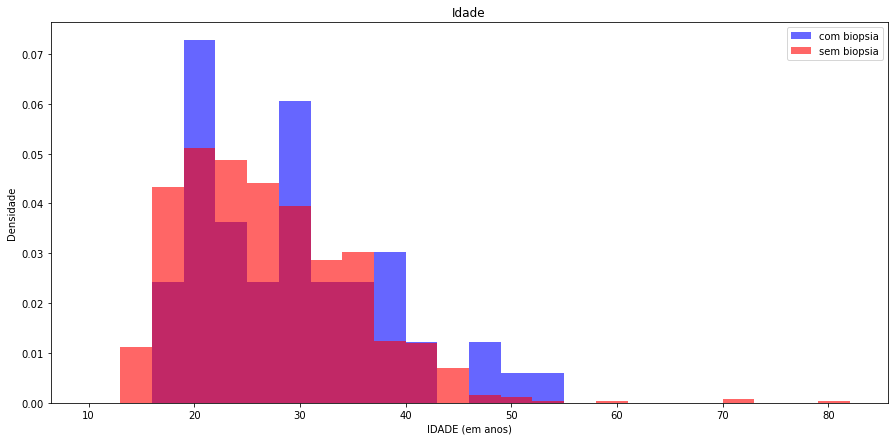

In [13]:
faixa1 = arange(10,85,3)

fig = plt.figure(figsize=(15, 7))
plt.subplot(111)
biopsia.Age.plot.hist(bins=faixa1, color=('blue'), density=1, alpha=0.6)
n_biopsia.Age.plot.hist(bins=faixa1,color=('red'), density=1, alpha=0.6)

plt.ylabel('Densidade')
plt.xlabel('IDADE (em anos)')
plt.legend(('com biopsia', 'sem biopsia'))
plt.title('Idade')
plt.show()

### ANÁLISE GRÁFICO 1
Idade é uma variável que não influencia tanto no desenvolvimento do câncer cervical nas mulheres, apesar de ter alguns valores com maior concentração.

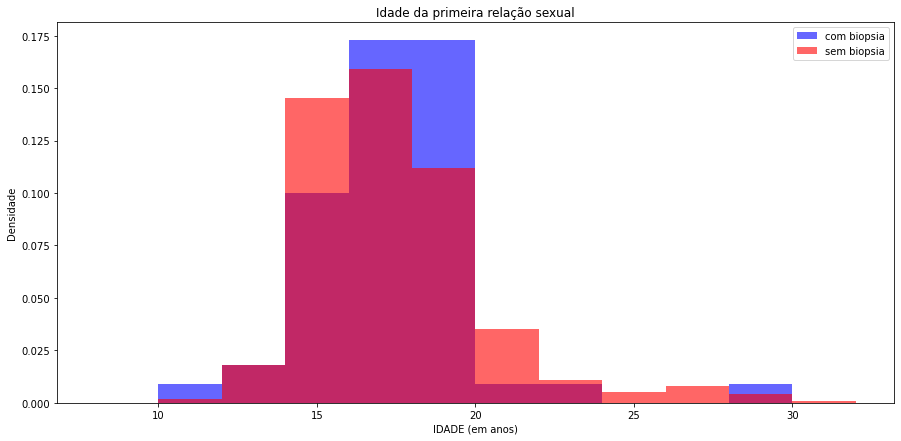

In [14]:
faixa2 = arange(8,34,2)

fig = plt.figure(figsize=(15, 7))
plt.subplot(111)
biopsia["First sexual intercourse"].plot.hist(bins=faixa2, color=('blue'), density=1, alpha=0.6)
n_biopsia["First sexual intercourse"].plot.hist(bins=faixa2,color=('red'), density=1, alpha=0.6)

plt.ylabel('Densidade')
plt.xlabel('IDADE (em anos)')
plt.legend(('com biopsia', 'sem biopsia'))
plt.title("Idade da primeira relação sexual")
plt.show()

### ANÁLISE GRÁFICO 2
Idade da primeira relação sexual é uma variável que tem influência muito pequena no desenvolvimento do câncer cervical nas mulheres, apesar de ter uma densidade maior de 16 a 20 anos.

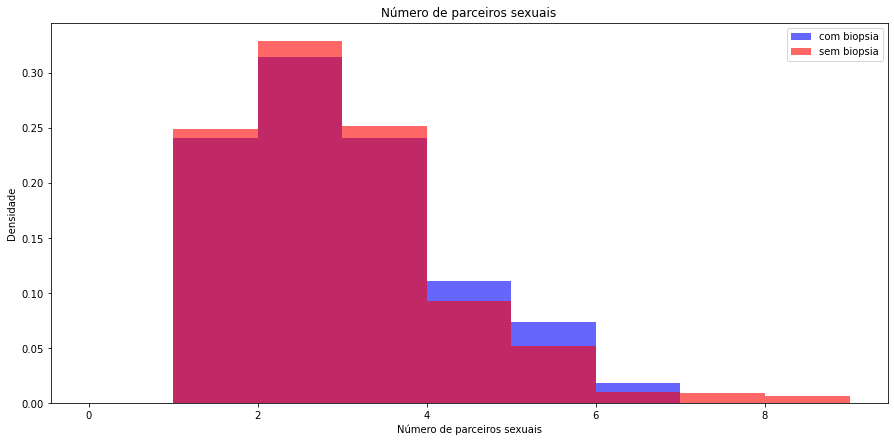

In [15]:
faixa3 = arange(0,10,1)

fig = plt.figure(figsize=(15, 7))
plt.subplot(111)
biopsia["Number of sexual partners"].plot.hist(bins=faixa3, color=('blue'), density=1, alpha=0.6)
n_biopsia["Number of sexual partners"].plot.hist(bins=faixa3,color=('red'), density=1, alpha=0.6)

plt.ylabel('Densidade')
plt.xlabel('Número de parceiros sexuais')
plt.legend(('com biopsia', 'sem biopsia'))
plt.title("Número de parceiros sexuais")
plt.show()

### ANÁLISE GRÁFICO 3
Em relação à biopsia negativa, a positiva teve um aumento na sua densidade quando o número de parceiros era maior que 4.

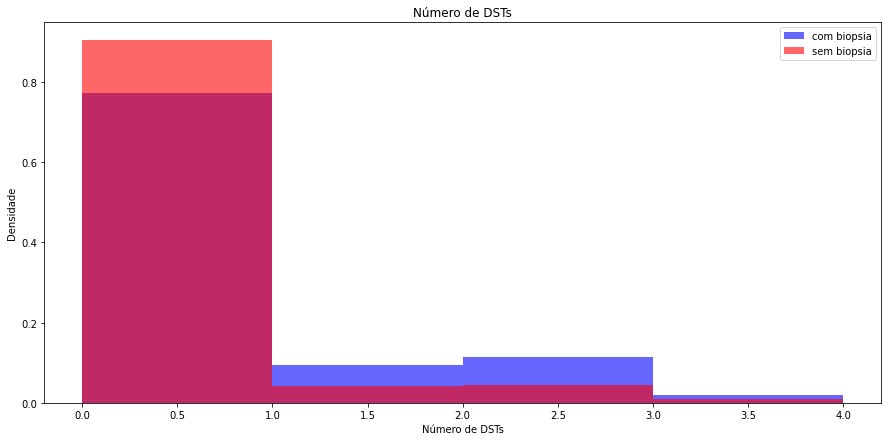

In [16]:
faixa4 = arange(0,5,1)

fig = plt.figure(figsize=(15, 7))
plt.subplot(111)
biopsia["STDs (number)"].plot.hist(bins=faixa4, color=('blue'), density=1, alpha=0.6)
n_biopsia["STDs (number)"].plot.hist(bins=faixa4,color=('red'), density=1, alpha=0.6)

plt.ylabel('Densidade')
plt.xlabel('Número de DSTs')
plt.legend(('com biopsia', 'sem biopsia'))
plt.title("Número de DSTs")
plt.show()

### ANÁLISE GRÁFICO 4
Das mulheres que tem DST (maior que 1), as que foram diagnosticadas com câncer representam uma maior densidade. 

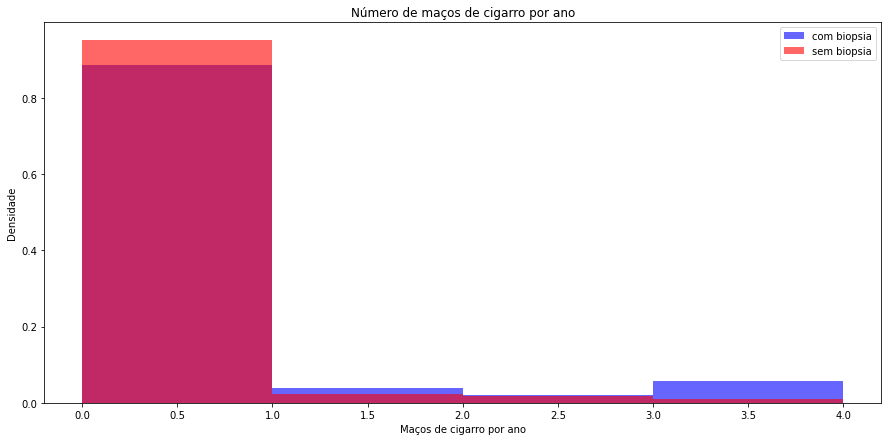

In [17]:
faixa5 = arange(0,40,2)

fig = plt.figure(figsize=(15, 7))
plt.subplot(111)
biopsia["Smokes (packs/year)"].plot.hist(bins=faixa4, color=('blue'), density=1, alpha=0.6)
n_biopsia["Smokes (packs/year)"].plot.hist(bins=faixa4,color=('red'), density=1, alpha=0.6)

plt.ylabel('Densidade')
plt.xlabel('Maços de cigarro por ano')
plt.legend(('com biopsia', 'sem biopsia'))
plt.title("Número de maços de cigarro por ano")
plt.show()

### ANÁLISE GRÁFICO 5
Das mulheres que foram diagnosticadas com câncer, há uma porcentagem maior que fuma mais de três maços de cigarro.

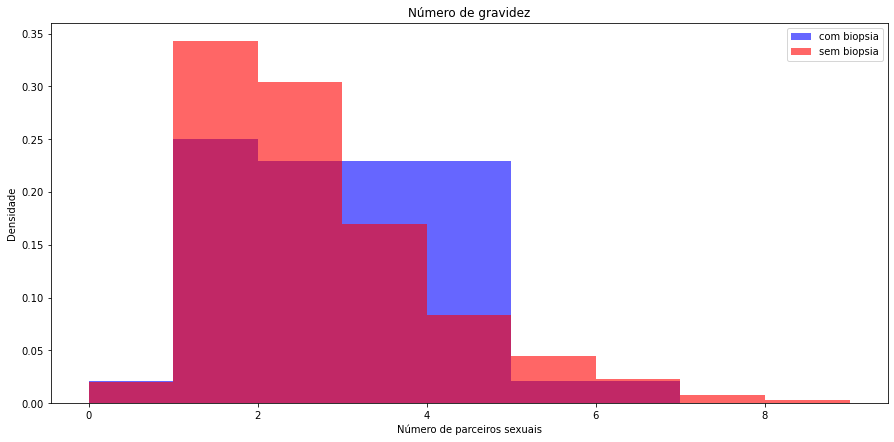

In [18]:
faixa6 = arange(0,12,1)

fig = plt.figure(figsize=(15, 7))
plt.subplot(111)
biopsia["Num of pregnancies"].plot.hist(bins=faixa3, color=('blue'), density=1, alpha=0.6)
n_biopsia["Num of pregnancies"].plot.hist(bins=faixa3,color=('red'), density=1, alpha=0.6)

plt.ylabel('Densidade')
plt.xlabel('Número de parceiros sexuais')
plt.legend(('com biopsia', 'sem biopsia'))
plt.title("Número de gravidez")
plt.show()

### ANÁLISE GRÁFICO 6
O número de gravidezes nãoé um fato relevante no desenvolvimento do câncer cervical nas mulheres.

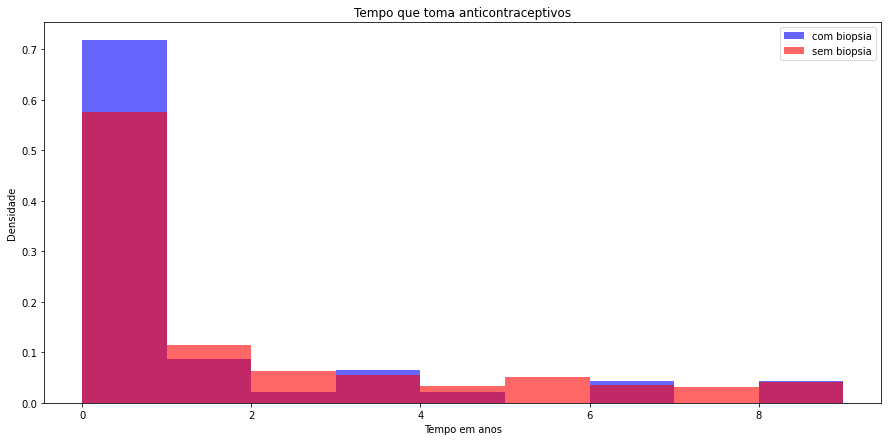

In [19]:
faixa7 = arange(0,12,1)

fig = plt.figure(figsize=(15, 7))
plt.subplot(111)
biopsia["Hormonal Contraceptives (years)"].plot.hist(bins=faixa3, color=('blue'), density=1, alpha=0.6)
n_biopsia["Hormonal Contraceptives (years)"].plot.hist(bins=faixa3,color=('red'), density=1, alpha=0.6)

plt.ylabel('Densidade')
plt.xlabel('Tempo em anos')
plt.legend(('com biopsia', 'sem biopsia'))
plt.title("Tempo que toma anticontraceptivos")
plt.show()

### ANÁLISE GRÁFICO 7
Dentre as mulheres que usam anticoncepcional, não há distinção entre diagnóstico positivo e negativo.

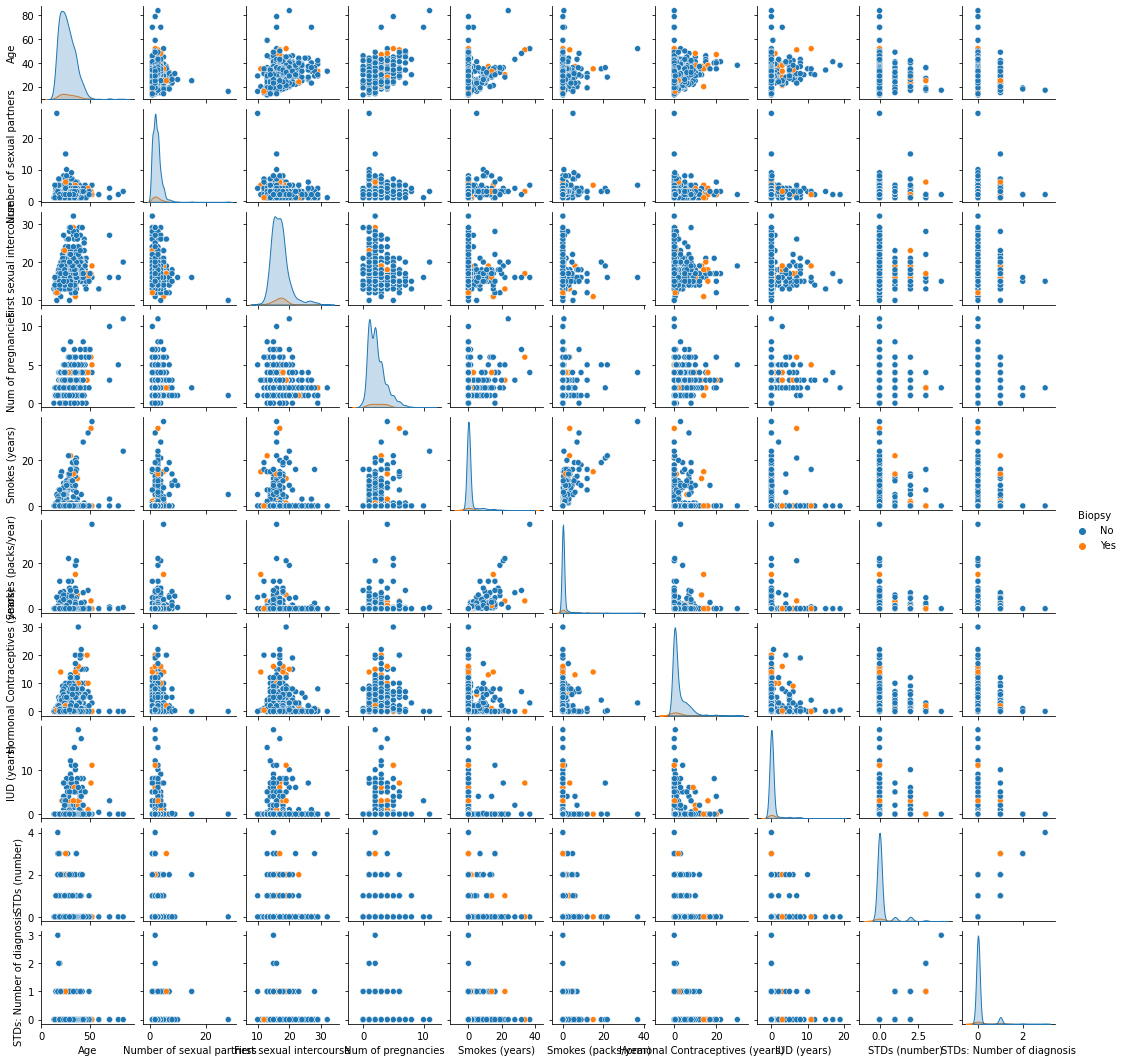

In [20]:
sns.pairplot(dados, hue="Biopsy", height=1.5)

--------------------------------------------------------------------------------------------------------------------------------

# Decision Tree 

  O modelo Decision Tree é um dos mais famosos no ramo de estudo de Machine Learning e nesse projeto utilizamos o método "DecisionTreeClassifier", devido ao nosso target ser uma variável qualitativa. É um classificador moldado em árvore, no qual os nódulos internos representam as características da nossa base de dados, os ramos representam as regras de decisão e os nós de cada folha representam o resultado do modelo.

Nesse modelo, há dois nós na árvore de decisão (Nó de Decisão e Nó de Folha). Os nós da Folha são saídas das decisões e não contêm mais ramos, enquanto os nós de Decisão são usados para tomar qualquer decisão e possui vários ramos. 

Outro aspecto importante para ressaltarmos é o Índice de Gini. Ele é uma ferramenta que mede a impureza ou pureza da criação da árvore de decisão através do algoritmo "Classification and Regression Tree". Uma das regras para a utilização desse índice para possíveis conclusões da árvores é que deve ser preferido atributos com valores mais baixos.

In [21]:
#Criando DataFrame sem a coluna Biopsy
dados_sembio = dados_final.loc[:, ['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis']]



#Criando Dataframe somente coma coluna Biopsy
biopsia = dados_final.loc[:, 'Biopsy']

In [22]:
#Criando arvore de decisão 
clf = DecisionTreeClassifier(random_state=0)
#Cruza valores para arvore de decisão 
cross_val_score(clf, dados_sembio, biopsia, cv=10)

array([0.85074627, 0.73134328, 0.80597015, 0.89552239, 0.92537313,
       0.91044776, 0.91044776, 0.85074627, 0.78787879, 0.87878788])

In [23]:
#Separando dados em treinamento e teste 
X_train, X_test, y_train, y_test = train_test_split(dados_sembio, biopsia, test_size=0.33, random_state=42)

In [24]:
#Treinando a arvore de decisão
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [25]:
#Base de teste
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0], dtype=int64)

In [26]:
#Precissão da arvore de testes
clf.score(X_test, y_test)

0.8642533936651584

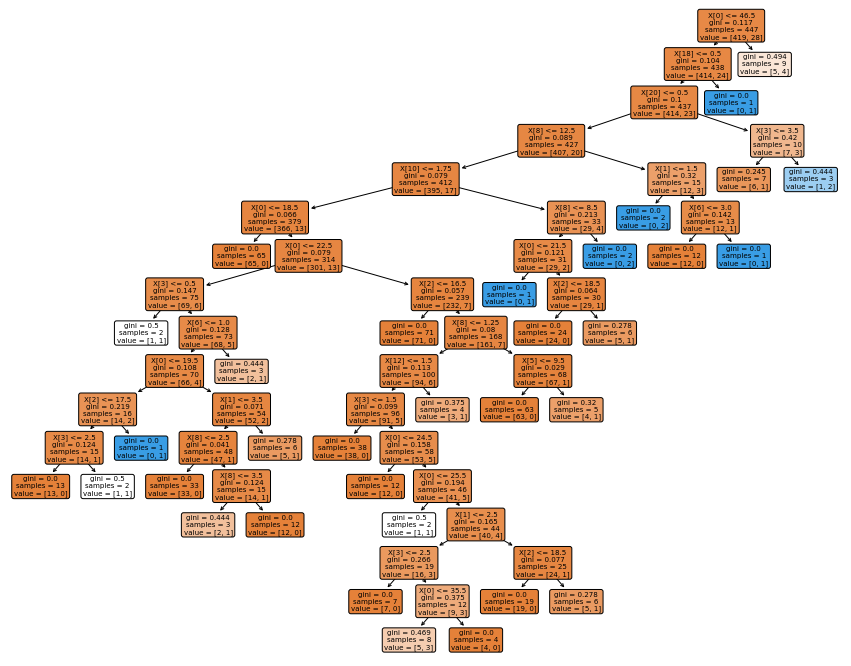

In [27]:
# Cria a decision tree classifier a partir dos dados de treinamento
modelo = DecisionTreeClassifier(min_samples_split=10, random_state=2) #min_samples_split cria o mínimo de amostras necessaria para a criação de um novo node
modelo = modelo.fit(X_train, y_train)

plt.figure(figsize=(15, 12))
plot_tree(modelo, filled=True, rounded=True); #plot da imagem da decision tree abaixo

In [28]:
#Predicting o resultado do conjunto de testes
y_pred= modelo.predict(X_test)

#Creating a matriz da confusão
cm= confusion_matrix (y_test, y_pred)
print(f'Matriz: {cm}')
print()
print(y_test.value_counts())

Matriz: [[200   4]
 [ 17   0]]

0    204
1     17
Name: Biopsy, dtype: int64


###### Depois do treinamento, esses foram os resultados do teste:
- 0 , 0: Sem câncer, classificado corretamente (200); 
- 0 , 1: Erro tipo I: Com câncer, classificado sem câncer (17); 
- 1 , 0: Erro tipo II: Sem câncer, classificado com câncer (4); 
- 1 , 1: Com câncer, classificado corretamente (0).

In [29]:
# Erro quadrático do modelo
erro = mean_squared_error(y_test, y_pred)
erro

0.09502262443438914

### CONCLUSÃO DO MODELO - DECISION TREE

- Com o modelo Decision Tree conseguimos prever corretamente 86% do teste. Entretanto, após a análise dos resultados, percebe-se através da criação da Matriz de Conclusão que o nosso modelo tende a classificar corretamente somente as mulheres que não possuem predisposição a terem câncer.

- Erro quadrático do modelo = 0.095

---------------------------------------------------------------------------------------------------------------------------------

# Random Trees

A Random Forest Regression tem como essência o uso de múltiplas árvores de decisão para a determinação do output final em vez de utilizar apenas uma árvore. A escolha desse modelo foi devido a sua popularidade e boa performance na acurácia.

O modelo Random Tree também é outro modelo utilizado no ramo de estudo de Machine Learning e consiste em um grupo de árvores de decisão individuais onde cada árvore é gerada a partir de diferentes amostras e subgrupos dos dados da base de treinamento. A ideia por trás de chamar essas árvores de decisão é que para cada variável que é classificada, séries de decisões são tomadas em uma ordem de relevância e importância.

Este modelo é chamado de Random Forest pois ele classifica um grupo de dados várias vezes com base em uma seleção aleatória de variáveis de treinamento que por consequência, resulta em muitas árvores de decisão. Para ter uma decisão final, cada árvore possui um voto.

In [30]:
colunas = list(dados_sembio.columns)

In [31]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
regressor = RandomForestRegressor(n_estimators=1000, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [33]:
# Usa o método de previsão no teste 
predictions = regressor.predict(X_test,)

# Calcula os erros absolutos
errors2 = abs(predictions - y_test,)

In [34]:
tree = regressor.estimators_[5]

# Exporta a imagem
export_graphviz(tree, out_file = 'tree.dot', feature_names = colunas, rounded = True, precision = 1)

# Usa o arquivo criado para criar um gráfico
(graph, ) = pydot.graph_from_dot_file('tree.dot')

In [35]:
# Extrai o peso (importância) de cada coluna
importancia = list(regressor.feature_importances_)
feature_importancia = [(feature, round(importance, 2)) for feature, importance in zip(colunas, importancia)]
feature_importancia = sorted(feature_importancia, key = lambda x: x[1], reverse = True)

Text(0.5, 1.0, 'Variáveis importantes')

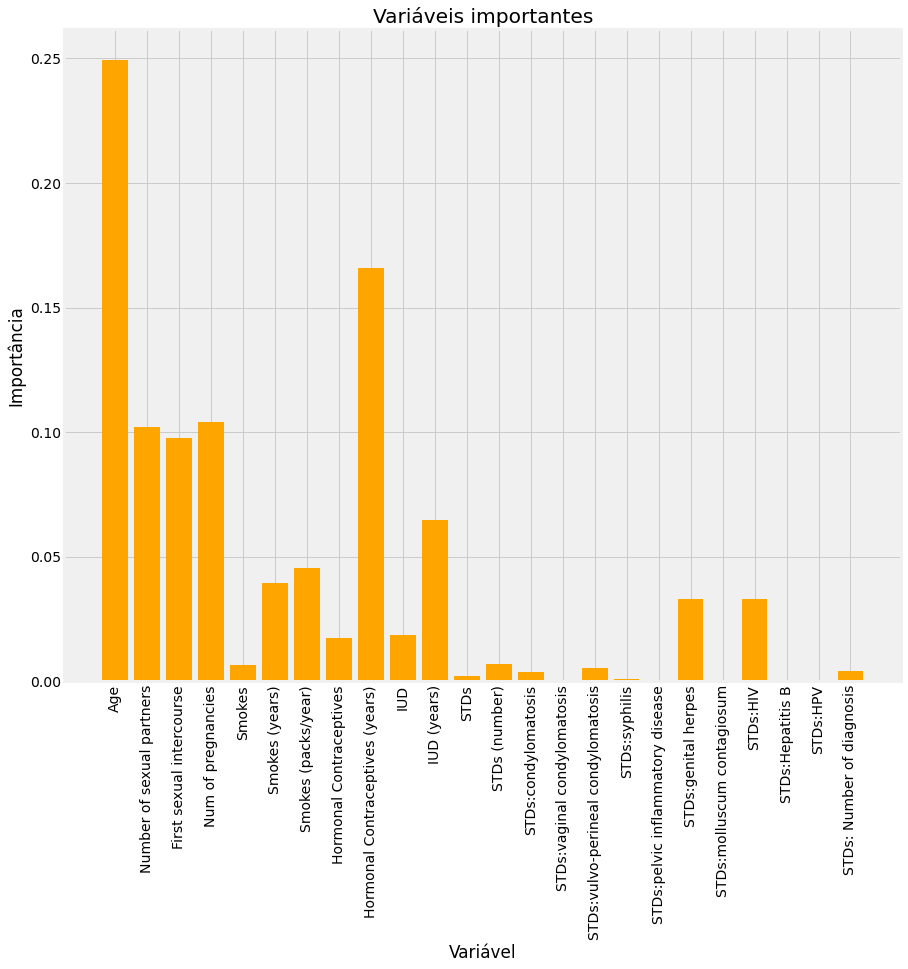

In [36]:
# Faz o gráfico de barras das variáveis por sua respectiva importância

plt.figure(figsize=(15, 12))
plt.style.use('fivethirtyeight')
x_values = list(range(len(importancia)))
plt.bar(x_values, importancia, orientation = 'vertical', color= 'orange')
plt.xticks(x_values, colunas, rotation='vertical')
plt.ylabel('Importância')
plt.xlabel('Variável')
plt.title('Variáveis importantes')

In [37]:
# Criando previsões
predictions_regressor = regressor.predict(X_test)

# Encontrando o erro quadrático médio do nosso modelo de RandomForest
rmse_regressor = np.sqrt(mean_squared_error(y_test, predictions_regressor))
rmse_regressor = round(rmse_regressor,4)

rmse_regressor

0.2714

### CONCLUSÃO DO MODELO - RANDOM TREES

- Com esse modelo pode-se concluir que a variável "Age" é a mais importante no quesito de ter ou não uma predisposição de câncer, seguido do tempo de uso de anticoncepcional ("Hormonal Contraceptives (years)"). 

- Erro quadrático do modelo = 0.2714

---------------------------------------------------------------------------------------------------------------------------------

# Regressão Logística

Esse modelo é usado para descrever bases de dados e explicar a relação entre uma variável binária dependente e uma ou mais variáveis nominais, ordinais, de intervalo ou independentes de nível de raciocínio.

Uma consideração importante é o ajuste do modelo. A adição de variáveis independentes a um modelo de regressão logística sempre aumentará a quantidade de variância explicada nas probabilidades logísticas. Contudo, adicionar mais e mais variáveis ao modelo pode resultar em um superajuste, o que reduz a generalização do modelo além dos dados nos quais o modelo se encaixa.

In [38]:
model = LogisticRegression()
model.fit(X_train,y_train)
lr_prediction = model.predict(X_test)
print('Acurácia da Regressão Logística = ', metrics.accuracy_score(lr_prediction,y_test))

print()
print("y_predicted",lr_prediction)
print()
print("y_test",list(y_test))

Acurácia da Regressão Logística =  0.9095022624434389

y_predicted [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

y_test [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1

In [39]:
dados_sembio2 = dados_final.loc[:, ['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies','Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)','STDs (number)']]

In [40]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(dados_sembio2, biopsia, test_size=0.33, random_state=42)

In [41]:
# Construindo o modelo
log_reg = sm.Logit(y_train2.astype(float), X_train2.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.232805
         Iterations 7


In [42]:
# Imprimindo tabela resumo
reg = sm.OLS(y_train2.astype(float), X_train2.astype(float)).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Biopsy   R-squared (uncentered):                   0.092
Model:                            OLS   Adj. R-squared (uncentered):              0.072
Method:                 Least Squares   F-statistic:                              4.451
Date:                Tue, 08 Jun 2021   Prob (F-statistic):                    5.47e-06
Time:                        15:59:34   Log-Likelihood:                          6.5854
No. Observations:                 447   AIC:                                      6.829
Df Residuals:                     437   BIC:                                      47.85
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Age                                 0.0004      0.002      0.214      0.831      -0.003       0.004
Number of sexual partners          -0.0028      0.007     -0.422      0.673      -0.016       0.010
First sexual intercourse            0.0020      0.003      0.725      0.469      -0.003       0.007
Num of pregnancies                  0.0028      0.010      0.283      0.777      -0.016       0.022
Smokes (packs/year)                -0.0009      0.005     -0.169      0.866      -0.011       0.010
Hormonal Contraceptives            -0.0116      0.027     -0.424      0.672      -0.066       0.042
Hormonal Contraceptives (years)     0.0056      0.003      1.627      0.104      -0.001       0.012
IUD                                 0.1045      0.062      1.674      0.095      -0.018       0.227
IUD (years)                        -0.0039      0.009     -0.417      0.677      -0.022       0.015
STDs (number)                       0.0303      0.022      1.409      0.160      -0.012       0.073
==============================================================================
Omnibus:                      336.573   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2946.634
Skew:                           3.460   Prob(JB):                         0.00
Kurtosis:                      13.503   Cond. No.                         184.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Predição de performance no dataframe de teste
yhat = log_reg.predict(X_test2.astype(float))
prediction = list(map(round, yhat))
  
# Comparando os valores originais com os valores de predição do nosso y (Biopsy)
print()
print('Valores reais', list(y_test2.astype(float).values))
print()
print('Predição :', prediction)
print()


Valores reais [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,

In [44]:
# Matriz
cm = confusion_matrix(y_test2.astype(float), prediction) 
print ("Matriz : \n", cm) 

print ()

# Resultado de precisão do modelo
print('Teste de precisão = ', accuracy_score(y_test2.astype(float), prediction))

print()

print(y_test2.value_counts())

Matriz : 
 [[204   0]
 [ 17   0]]

Teste de precisão =  0.9230769230769231

0    204
1     17
Name: Biopsy, dtype: int64


##### Depois do treinamento, esses foram os resultados do teste:
- 0 , 0: Sem câncer, classificado corretamente (204); 
- 0 , 1: Erro tipo I: Com câncer, classificado sem câncer (17); 
- 1 , 0: Erro tipo II: Sem câncer, classificado com câncer (0); 
- 1 , 1: Com câncer, classificado corretamente (0).

In [45]:
# Erro quadrático do modelo = 0.092 -> RETIRADO DO SUMÁRIO

### CONCLUSÃO DO MODELO - LOGISTIC REGRESSION

- Com o modelo Decision Tree conseguimos prever corretamente 86% do teste. Entretanto, após a análise dos resultados, percebe-se através da criação da Matriz de Conclusão que o nosso modelo tende a classificar corretamente somente as mulheres que não possuem predisposição a terem câncer.

- Erro quadrático do modelo = 0.092

--------------------------------------------------------------------------------------------------------------------------------

# CONCLUSÃO FINAL 

- Com esse projeto concluímos que o modelo mais adequado é o de Regressão Logística, pois possuí o menor erro quadrático entre todos os modelos.

- A partir dos três modelos podemos tirar conclusôes para o nosso projeto. No segundo modelo, percebemos que duas variáveis eram mais importantes e se destacavam mais no quesito de ter ou não câncer.
- Apesar de termos analisado características pontuais nas pessoas [mulheres] que possuem câncer cervical, concluímos que não é possível, a partir dos dados que temos e com os modelos que utilizamos, saber se uma pessoa realmente tem predisposição a esse tipo de câncer, visto que não encontramos um comportamento semelhantes nas mulheres cuja a biopsia foi positiva. 
- Ou seja, uma das melhorias que poderíamos realizar seria trocarmos a base de dados, em busca de uma maior quantidade de entrevistados que possuissem uma relevância maior em relação ao nosso target, pois basicamente nossa base de dados tinha uma quantia de mulheres com câncer maior que mulheres sem câncer.

- Ranking dos modelos:
    - 1° - Regressão Logística (0.092)
    - 2° - Decision Tree (0.095)
    - 3° - Random Tree (0.2714)

-------------------------------------------------------------------------------------------------------------------------------

### PROPOSTA DE PROGRAMA

In [53]:
print (importancia)

[0.24942689382837507, 0.10214750115763128, 0.0975753446512413, 0.10395342372765272, 0.006447487812785916, 0.03925032627182742, 0.0453684303260206, 0.01727234293331649, 0.1658006526438311, 0.01839101728799195, 0.06453579301380143, 0.0020986996775268453, 0.007055247528996095, 0.0035936070241852497, 0.0003070946874252665, 0.005226205668140775, 0.001023563446987726, 0.00012450798761675416, 0.03319295041572236, 0.0, 0.03300710400706834, 0.00017797019956943016, 2.9353821907013377e-05, 0.0039944818803788265]


- A partir dos valores de importância de cada variável que extraímos no modelo Random Trees, construiríamos um programa que pegaria as informações das variáveis (idade, número de gravidez, etc...). Se o valor colocado pelo usuário fosse igual ou maior a média dos valores daquela variável, então o programa consideraria o valor daquela importância. 

- Para isso realizaríamos um filtro que selecionasse apenas mulheres com câncer na nossa base de dados, ou seja, teríamos uma "nova" base de dados como referência.

- Ex: Se a Idade do usuário for $\geq$ a média das idades da nova base de dados, o programa somaria 0.24942689382837507.

In [58]:
# EXEMPLO DE CÓDIGO:

# OBS 1: A FUNÇÃO RECEBERIA COMO ARGUMENTO OS VALORES DE TODAS AS VARIÁVEIS, NESSE EXEMPLO SÓ RECEBE A IDADE E O NÚMERO DE GRAVIDEZ
# OBS 2: OS VALORES DA IMPORTÂCIA, PREDISPOSIÇÃO, IDADE, NÚMERO DE GRAVIDEZ, MÉDIA DAS IDADES E MÉDIA DO NÚMERO DE GRAVIDEZ SÃO FICTÍCIOS NESSE EXEMPLO.

def predisposicao (idade, ng):

    imp_idade = 0.63
    imp_ng = 0.37

    m_idade = 50
    m_ng = 3

    if idade >= m_idade:
        idade = 1
    else:
        idade = 0
        
    if ng >= m_ng:
        ng = 1
    else:
        ng = 0

    p = imp_idade*idade + imp_ng*ng
    return p

print(predisposicao(67, 2))

0.63


------------------------------------------------------------------------------------------------------------------------------

### Referências:
* Algoritmo de classificação de árvore de decisão de aprendizagem de máquina
https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm
* Classificador de árvores aleatórias de trem
https://desktop.arcgis.com/en/arcmap/latest/tools/spatial-analyst-toolbox/train-random-trees-classifier.htm
* O que é Regressão Logística? - CENTRO DE ESTATÍSTICA APLICADA
https://estatistica.pt/o-que-e-regressao-logistica/
* Classificador por Decision Tree
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomTreesEmbedding.html?highlight=random%20tree#sklearn.ensemble.RandomTreesEmbedding
* Classificador por Random Trees
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomTreesEmbedding.html?highlight=random%20tree#sklearn.ensemble.RandomTreesEmbedding
* Código Regressão Logística
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html